# Import Data & Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('default of credit card clients.xls',header = 1)

In [3]:
df_train,df_test = train_test_split(df,test_size=0.3,random_state= 42)

# Feature Engineering: Train data preparation

In [4]:
df_temp = df_train.copy()

In [5]:
print(df_temp.shape)
df_temp.head()

(21000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
28465,28466,240000,2,1,1,40,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
27622,27623,50000,2,1,2,23,-1,-1,-1,-1,...,4800,9810,660,2548,2321,4800,9810,660,2980,0
28376,28377,50000,2,2,1,36,2,2,2,2,...,47956,43578,35126,0,4700,0,2004,3500,0,0
10917,10918,200000,2,3,1,54,6,5,4,3,...,102549,101400,0,0,0,0,0,0,0,0
27234,27235,240000,1,1,1,35,-1,-1,-1,0,...,17102,13367,22659,2017,21817,1120,13434,22772,22820,0


In [6]:
df_temp.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default payment next month'], dtype=object)

In [7]:
months_info = [
    ('Sep', 'PAY_0', 'BILL_AMT1', 'PAY_AMT1'),
    ('Aug', 'PAY_2', 'BILL_AMT2', 'PAY_AMT2'),
    ('Jul', 'PAY_3', 'BILL_AMT3', 'PAY_AMT3'),
    ('Jun', 'PAY_4', 'BILL_AMT4', 'PAY_AMT4'),
    ('May', 'PAY_5', 'BILL_AMT5', 'PAY_AMT5'),
    ('Apr', 'PAY_6', 'BILL_AMT6', 'PAY_AMT6'),
]

In [8]:
def generate_monthly_features(df,months_info):
    
    dfs = []
    
    for month,pay_col,bill_col,pay_amt_col in months_info:
        temp_df = df[['ID','LIMIT_BAL',pay_col,bill_col,pay_amt_col]].copy()
        
        temp_df[f'utilization_ratio {month}'] = temp_df[bill_col]/temp_df['LIMIT_BAL']

        temp_df[f'Paid {month}'] = np.where(temp_df[pay_amt_col] > 0, 1,0)

        temp_df[f'Delinquent {month}'] = np.where(temp_df[pay_col] >= 1, 1,0)
        
        keep_cols = ['ID',f'utilization_ratio {month}',f'Paid {month}',f'Delinquent {month}']
        
        dfs.append(temp_df[keep_cols])
    
    for temp_df in dfs:
        df = pd.merge(df,temp_df,on='ID',how='inner')
            
    return df

In [9]:
df_temp = generate_monthly_features(df_temp, months_info)

In [10]:
df_temp.rename(columns={'PAY_0':'PAY_Sep','PAY_2':'PAY_Aug','PAY_3':'PAY_Jul','PAY_4':'PAY_Jun','PAY_5':'PAY_May','PAY_6':'PAY_Apr'},inplace= True)

In [11]:
df_temp.rename(columns={'BILL_AMT1':'BILL_AMT_Sep','BILL_AMT2':'BILL_AMT_Aug','BILL_AMT3':'BILL_AMT_Jul','BILL_AMT4':'BILL_AMT_Jun','BILL_AMT5':'BILL_AMT_May','BILL_AMT6':'BILL_AMT_Apr'},inplace= True)

In [12]:
df_temp.rename(columns={'PAY_AMT1':'PAY_AMT_Sep','PAY_AMT2':'PAY_AMT_Aug','PAY_AMT3':'PAY_AMT_Jul','PAY_AMT4':'PAY_AMT_Jun','PAY_AMT5':'PAY_AMT_May','PAY_AMT6':'PAY_AMT_Apr'},inplace= True)

In [13]:
df_temp.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_Sep', 'PAY_Aug', 'PAY_Jul', 'PAY_Jun', 'PAY_May', 'PAY_Apr',
       'BILL_AMT_Sep', 'BILL_AMT_Aug', 'BILL_AMT_Jul', 'BILL_AMT_Jun',
       'BILL_AMT_May', 'BILL_AMT_Apr', 'PAY_AMT_Sep', 'PAY_AMT_Aug',
       'PAY_AMT_Jul', 'PAY_AMT_Jun', 'PAY_AMT_May', 'PAY_AMT_Apr',
       'default payment next month', 'utilization_ratio Sep', 'Paid Sep',
       'Delinquent Sep', 'utilization_ratio Aug', 'Paid Aug',
       'Delinquent Aug', 'utilization_ratio Jul', 'Paid Jul',
       'Delinquent Jul', 'utilization_ratio Jun', 'Paid Jun',
       'Delinquent Jun', 'utilization_ratio May', 'Paid May',
       'Delinquent May', 'utilization_ratio Apr', 'Paid Apr',
       'Delinquent Apr'], dtype=object)

In [14]:
def reorder_columns_monthwise(df):
    base_cols = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']
    target_col = ['default payment next month']
    
    months = ['Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr']
    ordered_month_cols = []

    for month in months:
        for prefix in ['PAY', 'BILL_AMT', 'PAY_AMT', 'utilization_ratio', 'Paid', 'Delinquent']:
            col_name = f'{prefix} {month}' if prefix in ['utilization_ratio', 'Paid', 'Delinquent'] else f'{prefix}_{month}'
            if col_name in df.columns:
                ordered_month_cols.append(col_name)

    new_order = base_cols + ordered_month_cols + target_col
    return df[new_order]

In [15]:
df_temp = reorder_columns_monthwise(df_temp)

In [16]:
df_temp.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_Sep', 'BILL_AMT_Sep', 'PAY_AMT_Sep', 'utilization_ratio Sep',
       'Paid Sep', 'Delinquent Sep', 'PAY_Aug', 'BILL_AMT_Aug',
       'PAY_AMT_Aug', 'utilization_ratio Aug', 'Paid Aug',
       'Delinquent Aug', 'PAY_Jul', 'BILL_AMT_Jul', 'PAY_AMT_Jul',
       'utilization_ratio Jul', 'Paid Jul', 'Delinquent Jul', 'PAY_Jun',
       'BILL_AMT_Jun', 'PAY_AMT_Jun', 'utilization_ratio Jun', 'Paid Jun',
       'Delinquent Jun', 'PAY_May', 'BILL_AMT_May', 'PAY_AMT_May',
       'utilization_ratio May', 'Paid May', 'Delinquent May', 'PAY_Apr',
       'BILL_AMT_Apr', 'PAY_AMT_Apr', 'utilization_ratio Apr', 'Paid Apr',
       'Delinquent Apr', 'default payment next month'], dtype=object)

In [17]:
df_temp['EDUCATION'].value_counts(dropna= False)

2    9796
1    7433
3    3444
5     195
4      85
6      38
0       9
Name: EDUCATION, dtype: int64

In [18]:
mode_education_train = df_temp['EDUCATION'].mode()


In [19]:
df_temp['EDUCATION'] = np.where(df_temp['EDUCATION'] == 0, mode_education_train,df_temp['EDUCATION'])

In [20]:
education_mapping = {
    1: 'Graduate School',
    2: 'University',
    3: 'High School',
    4: "Others",
    5: "Others",
    6: "Others"
}

df_temp['EDUCATION'] = df_temp['EDUCATION'].map(education_mapping)

In [21]:
df_temp['EDUCATION'].value_counts(dropna= False)

University         9805
Graduate School    7433
High School        3444
Others              318
Name: EDUCATION, dtype: int64

In [22]:
df_temp['SEX'].value_counts(dropna= False)

2    12724
1     8276
Name: SEX, dtype: int64

In [23]:
gender_mapping = {
    1: 'Male',
    2: 'Female'
}

df_temp['SEX'] = df_temp['SEX'].map(gender_mapping)

In [24]:
df_temp['SEX'].value_counts(dropna= False)

Female    12724
Male       8276
Name: SEX, dtype: int64

In [25]:
df_temp['MARRIAGE'].value_counts(dropna= False)

2    11132
1     9605
3      228
0       35
Name: MARRIAGE, dtype: int64

In [26]:
mode_marriage_train = df_temp['MARRIAGE'].mode()

In [27]:
df_temp['MARRIAGE'] = np.where(df_temp['MARRIAGE'] == 0,2,df_temp['MARRIAGE'])

In [28]:
df_temp['MARRIAGE'].value_counts(dropna= False)

2    11167
1     9605
3      228
Name: MARRIAGE, dtype: int64

In [29]:
marital_mapping = {
    1: 'Married',
    2: 'Single',
    3: 'Others'
}

df_temp['MARRIAGE'] = df_temp['MARRIAGE'].map(marital_mapping)

In [30]:
df_temp['MARRIAGE'].value_counts(dropna= False)

Single     11167
Married     9605
Others       228
Name: MARRIAGE, dtype: int64

In [31]:
df_temp.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_Sep                       0
BILL_AMT_Sep                  0
PAY_AMT_Sep                   0
utilization_ratio Sep         0
Paid Sep                      0
Delinquent Sep                0
PAY_Aug                       0
BILL_AMT_Aug                  0
PAY_AMT_Aug                   0
utilization_ratio Aug         0
Paid Aug                      0
Delinquent Aug                0
PAY_Jul                       0
BILL_AMT_Jul                  0
PAY_AMT_Jul                   0
utilization_ratio Jul         0
Paid Jul                      0
Delinquent Jul                0
PAY_Jun                       0
BILL_AMT_Jun                  0
PAY_AMT_Jun                   0
utilization_ratio Jun         0
Paid Jun                      0
Delinquent Jun                0
PAY_May                       0
BILL_AMT

In [32]:
df_temp.shape

(21000, 43)

In [33]:
# One-hot encoding without dropping any columns
df_temp = pd.get_dummies(df_temp, columns=['EDUCATION', 'SEX','MARRIAGE'], drop_first=False)

In [34]:
df_temp.columns.values

array(['ID', 'LIMIT_BAL', 'AGE', 'PAY_Sep', 'BILL_AMT_Sep', 'PAY_AMT_Sep',
       'utilization_ratio Sep', 'Paid Sep', 'Delinquent Sep', 'PAY_Aug',
       'BILL_AMT_Aug', 'PAY_AMT_Aug', 'utilization_ratio Aug', 'Paid Aug',
       'Delinquent Aug', 'PAY_Jul', 'BILL_AMT_Jul', 'PAY_AMT_Jul',
       'utilization_ratio Jul', 'Paid Jul', 'Delinquent Jul', 'PAY_Jun',
       'BILL_AMT_Jun', 'PAY_AMT_Jun', 'utilization_ratio Jun', 'Paid Jun',
       'Delinquent Jun', 'PAY_May', 'BILL_AMT_May', 'PAY_AMT_May',
       'utilization_ratio May', 'Paid May', 'Delinquent May', 'PAY_Apr',
       'BILL_AMT_Apr', 'PAY_AMT_Apr', 'utilization_ratio Apr', 'Paid Apr',
       'Delinquent Apr', 'default payment next month',
       'EDUCATION_Graduate School', 'EDUCATION_High School',
       'EDUCATION_Others', 'EDUCATION_University', 'SEX_Female',
       'SEX_Male', 'MARRIAGE_Married', 'MARRIAGE_Others',
       'MARRIAGE_Single'], dtype=object)

In [35]:
#Columns to drop for multi-collinearity
col_to_drop = ['EDUCATION_Others','SEX_Female','MARRIAGE_Others']

In [36]:
df_temp.drop(columns= col_to_drop, inplace= True)

In [37]:
df_train = df_temp.copy()

In [38]:
print(df_train.shape)
df_train.head()

(21000, 46)


,ID,LIMIT_BAL,AGE,PAY_Sep,BILL_AMT_Sep,PAY_AMT_Sep,utilization_ratio Sep,Paid Sep,Delinquent Sep,PAY_Aug,...,utilization_ratio Apr,Paid Apr,Delinquent Apr,default payment next month,EDUCATION_Graduate School,EDUCATION_High School,EDUCATION_University,SEX_Male,MARRIAGE_Married,MARRIAGE_Single
0,28466,240000,40,-2,0,0,0.000000,0,0,-2,...,0.000000,0,0,1,1,0,0,0,1,0
1,27623,50000,23,-1,3430,2548,0.068600,1,0,-1,...,0.013200,1,0,0,1,0,0,0,0,1
2,28377,50000,36,2,46203,0,0.924060,0,1,2,...,0.702520,0,0,0,0,0,1,0,1,0
3,10918,200000,54,6,110185,0,0.550925,0,1,5,...,0.000000,0,1,0,0,1,0,0,1,0
4,27235,240000,35,-1,2024,2017,0.008433,1,0,-1,...,0.094412,1,0,0,1,0,0,1,1,0


In [39]:
df_train.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'PAY_Sep', 'BILL_AMT_Sep', 'PAY_AMT_Sep',
       'utilization_ratio Sep', 'Paid Sep', 'Delinquent Sep', 'PAY_Aug',
       'BILL_AMT_Aug', 'PAY_AMT_Aug', 'utilization_ratio Aug', 'Paid Aug',
       'Delinquent Aug', 'PAY_Jul', 'BILL_AMT_Jul', 'PAY_AMT_Jul',
       'utilization_ratio Jul', 'Paid Jul', 'Delinquent Jul', 'PAY_Jun',
       'BILL_AMT_Jun', 'PAY_AMT_Jun', 'utilization_ratio Jun', 'Paid Jun',
       'Delinquent Jun', 'PAY_May', 'BILL_AMT_May', 'PAY_AMT_May',
       'utilization_ratio May', 'Paid May', 'Delinquent May', 'PAY_Apr',
       'BILL_AMT_Apr', 'PAY_AMT_Apr', 'utilization_ratio Apr', 'Paid Apr',
       'Delinquent Apr', 'default payment next month',
       'EDUCATION_Graduate School', 'EDUCATION_High School',
       'EDUCATION_University', 'SEX_Male', 'MARRIAGE_Married',
       'MARRIAGE_Single'],
      dtype='object')

In [40]:
# Binary features already in 0/1 format — manually completed
already_one_hot_encoded_cols = [
    'Paid Sep', 'Delinquent Sep',
    'Paid Aug', 'Delinquent Aug',
    'Paid Jul', 'Delinquent Jul',
    'Paid Jun', 'Delinquent Jun',
    'Paid May', 'Delinquent May',
    'Paid Apr', 'Delinquent Apr',
    'EDUCATION_Graduate School', 'EDUCATION_High School',
    'EDUCATION_University', 'SEX_Male', 'MARRIAGE_Married',
    'MARRIAGE_Single'
]

In [41]:
cols_to_ignore_for_woe = already_one_hot_encoded_cols + ['ID']

In [42]:
cols_to_ignore_for_woe

['Paid Sep',
 'Delinquent Sep',
 'Paid Aug',
 'Delinquent Aug',
 'Paid Jul',
 'Delinquent Jul',
 'Paid Jun',
 'Delinquent Jun',
 'Paid May',
 'Delinquent May',
 'Paid Apr',
 'Delinquent Apr',
 'EDUCATION_Graduate School',
 'EDUCATION_High School',
 'EDUCATION_University',
 'SEX_Male',
 'MARRIAGE_Married',
 'MARRIAGE_Single',
 'ID']

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

def iv_woe(df_1, target):
    all_bins = []
    epsilon = 1e-10
    
    for col in df_1.columns:
        if col == target:
            continue
        
        df = df_1[[col, target]].copy()
        
        if df[col].dtype != 'object' and pd.api.types.is_numeric_dtype(df[col]):
            try:
                df['bin'] = pd.qcut(df[col], 10, duplicates='drop')
                group_col = 'bin'
            except Exception as e:
                print(f"Could not bin numeric column {col}: {e}")
                continue
        else:
            df['bin'] = df[col].astype(str)
            group_col = 'bin'

        summary = df.groupby(group_col)[target].agg(['count','sum']).reset_index()
        summary.rename(columns={'count': 'Total Observations', 'sum': 'Events'}, inplace=True)
        summary['Non events'] = summary['Total Observations'] - summary['Events']
        summary['% of Non events'] = summary['Non events'] / summary['Non events'].sum()
        summary['% of Events'] = summary['Events'] / summary['Events'].sum()
        summary['% of Non events'] = summary['% of Non events'].replace(0, epsilon)
        summary['% of Events'] = summary['% of Events'].replace(0, epsilon)
        summary['WoE'] = np.log(summary['% of Non events'] / summary['% of Events'])
        summary['IV'] = summary['WoE'] * (summary['% of Non events'] - summary['% of Events'])
        summary['Feature'] = col
        summary = summary[['Feature', 'bin', 'Total Observations', 'Non events', 'Events',
                           '% of Non events', '% of Events', 'WoE', 'IV']]
        all_bins.append(summary)
    
    woe_df = pd.concat(all_bins, ignore_index=True)
    iv_df = woe_df.groupby('Feature')['IV'].sum().reset_index(name='IV')
    return woe_df, iv_df

def parse_bounds(bin_label):
    matches = re.findall(r"[-+]?\d*\.\d+|\d+", bin_label)
    if len(matches) >= 2:
        return float(matches[0]), float(matches[1])
    else:
        return None, None

def merge_small_bins(woe_df, feature, min_bin_pct=0.02):
    woe_df_temp = woe_df[woe_df['Feature'] == feature].copy()

    # Skip merging for categorical bins
    try:
        pd.Interval(0, 1)  # test if Interval exists
        test_bin = woe_df_temp['bin'].iloc[0]
        if not isinstance(test_bin, pd.Interval):
            return woe_df_temp
    except:
        return woe_df_temp

    total_obs = woe_df_temp['Total Observations'].sum()
    min_bin_cnt = total_obs * min_bin_pct

    while (woe_df_temp['Total Observations'] < min_bin_cnt).any():
        small_bin_indx = woe_df_temp[woe_df_temp['Total Observations'] < min_bin_cnt].index
        if len(small_bin_indx) == 0:
            break

        idx = small_bin_indx[0]
        if idx == 0:
            merge_with = idx + 1
        else:
            merge_with = idx - 1

        # Merge label
        left_bound, _ = parse_bounds(str(woe_df_temp.at[merge_with, 'bin']))
        _, right_bound = parse_bounds(str(woe_df_temp.at[idx, 'bin']))
        if left_bound is not None and right_bound is not None:
            merged_bin_label = f"({left_bound}, {right_bound}]"
        else:
            merged_bin_label = f"{woe_df_temp.at[merge_with, 'bin']} + {woe_df_temp.at[idx, 'bin']}"

        woe_df_temp.at[merge_with, 'bin'] = merged_bin_label

        for col in ['Total Observations', 'Events', 'Non events']:
            woe_df_temp.at[merge_with, col] += woe_df_temp.at[idx, col]

        woe_df_temp = woe_df_temp.drop(index=idx).reset_index(drop=True)

        # Recalculate WoE/IV
        epsilon = 1e-10
        woe_df_temp['% of Non events'] = woe_df_temp['Non events'] / woe_df_temp['Non events'].sum()
        woe_df_temp['% of Events'] = woe_df_temp['Events'] / woe_df_temp['Events'].sum()
        woe_df_temp['% of Non events'] = woe_df_temp['% of Non events'].replace(0, epsilon)
        woe_df_temp['% of Events'] = woe_df_temp['% of Events'].replace(0, epsilon)
        woe_df_temp['WoE'] = np.log(woe_df_temp['% of Non events'] / woe_df_temp['% of Events'])
        woe_df_temp['IV'] = (woe_df_temp['% of Non events'] - woe_df_temp['% of Events']) * woe_df_temp['WoE']

    return woe_df_temp

def is_monotonic(col_series):
    return col_series.is_monotonic_increasing or col_series.is_monotonic_decreasing

def bin_merge(woe_df, feature):
    woe_df_temp = woe_df[woe_df['Feature'] == feature].copy()

    # Skip if not numeric bins
    try:
        test_bin = woe_df_temp['bin'].iloc[0]
        if not isinstance(test_bin, pd.Interval):
            return woe_df_temp
    except:
        return woe_df_temp

    while not is_monotonic(woe_df_temp['Total Observations']):
        diffs = woe_df_temp['WoE'].diff().abs()
        min_diff_index = diffs[1:].idxmin()
        previous_index = min_diff_index - 1

        left_bound, _ = parse_bounds(str(woe_df_temp.at[previous_index, 'bin']))
        _, right_bound = parse_bounds(str(woe_df_temp.at[min_diff_index, 'bin']))
        if left_bound is not None and right_bound is not None:
            merged_bin_label = f"({left_bound}, {right_bound}]"
        else:
            merged_bin_label = f"{woe_df_temp.at[previous_index, 'bin']} + {woe_df_temp.at[min_diff_index, 'bin']}"

        woe_df_temp.at[previous_index, 'bin'] = merged_bin_label

        for col in ['Total Observations', 'Events', 'Non events']:
            woe_df_temp.at[previous_index, col] += woe_df_temp.at[min_diff_index, col]

        woe_df_temp = woe_df_temp.drop(index=min_diff_index).reset_index(drop=True)

        # Recalculate WoE/IV
        epsilon = 1e-10
        woe_df_temp['% of Non events'] = woe_df_temp['Non events'] / woe_df_temp['Non events'].sum()
        woe_df_temp['% of Events'] = woe_df_temp['Events'] / woe_df_temp['Events'].sum()
        woe_df_temp['% of Non events'] = woe_df_temp['% of Non events'].replace(0, epsilon)
        woe_df_temp['% of Events'] = woe_df_temp['% of Events'].replace(0, epsilon)
        woe_df_temp['WoE'] = np.log(woe_df_temp['% of Non events'] / woe_df_temp['% of Events'])
        woe_df_temp['IV'] = (
            (woe_df_temp['% of Non events'] - woe_df_temp['% of Events']) * woe_df_temp['WoE']
        )

    return woe_df_temp

def plot_woe_distribution(df, feature):
    df_plot = df[df['Feature'] == feature].copy()
    df_plot['bin'] = df_plot['bin'].astype(str)

    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax1.bar(df_plot['bin'], df_plot['% of Non events'], label='% of Non events', color='blue')
    ax1.bar(df_plot['bin'], df_plot['% of Events'], bottom=df_plot['% of Non events'],
            label='% of Events', color='red')
    ax1.set_ylabel('Event/Non-event %')
    ax1.set_xlabel('Bins')
    ax1.set_xticklabels(df_plot['bin'], rotation=45, ha='right')
    ax1.legend(loc='upper left')

    ax2 = ax1.twinx()
    ax2.plot(df_plot['bin'], df_plot['WoE'], color='black', marker='o', label='WoE')
    ax2.set_ylabel('Weight of Evidence')
    ax2.axhline(y=0, color='gray', linestyle='--', linewidth=1)
    plt.title(f'WoE & Event Distribution - {feature}')
    fig.tight_layout()
    ax2.legend(loc='upper right')
    plt.show()

def compute_iv_optimize(df_1, target, min_bin_pct=0.02, plot=False):
    woe_df, iv_df = iv_woe(df_1, target)
    features = woe_df['Feature'].unique()

    final_df_list = []
    for col in features:
        merged = merge_small_bins(woe_df, col, min_bin_pct=min_bin_pct)
        merged = bin_merge(merged, col)
        final_df_list.append(merged)
        if plot:
            plot_woe_distribution(merged, col)

    final_woe_df = pd.concat(final_df_list, ignore_index=True)
    iv_df = final_woe_df.groupby('Feature')['IV'].sum().reset_index(name='IV')
    return final_woe_df, iv_df

In [44]:
woe_temp,iv_df = compute_iv_optimize(df_train.drop(columns=cols_to_ignore_for_woe),target = 'default payment next month',min_bin_pct= 0.02,plot = False)

In [45]:
woe_temp

,Feature,bin,Total Observations,Non events,Events,% of Non events,% of Events,WoE,IV
0,LIMIT_BAL,"(9999.999, 30000.0]",2843,1790,1053,0.109654,0.225192,-0.719621,0.083144
1,LIMIT_BAL,"(30000.0, 140000.0]",7886,5899,1987,0.361370,0.424936,-0.162036,0.010300
2,LIMIT_BAL,"(140000.0, 1000000.0]",10271,8635,1636,0.528976,0.349872,0.413376,0.074037
3,AGE,"(20.999, 25.0]",2745,2006,739,0.122887,0.158041,-0.251593,0.008845
4,AGE,"(25.0, 75.0]",18255,14318,3937,0.877113,0.841959,0.040905,0.001438
...,...,...,...,...,...,...,...,...,...
70,PAY_AMT_Apr,"(1500.0, 5000.0]",6339,5087,1252,0.311627,0.267750,0.151753,0.006658
71,PAY_AMT_Apr,"(5000.0, 527143.0]",3971,3414,557,0.209140,0.119119,0.562881,0.050671
72,utilization_ratio Apr,"(-1.511, 0.349]",12600,10302,2298,0.631095,0.491446,0.250105,0.034927
73,utilization_ratio Apr,"(0.349, 0.671]",4200,3198,1002,0.195908,0.214286,-0.089666,0.001648


In [46]:
import pandas as pd
import numpy as np
import re

def parse_interval(interval_str):
    """Parse a string like '(30000.0, 140000.0]' into a pd.Interval."""
    if not isinstance(interval_str, str):
        return np.nan
    match = re.match(r'[\[\(]([-\d\.]+),\s*([-\d\.]+)[\]\)]', interval_str)
    if match:
        left = float(match.group(1))
        right = float(match.group(2))
        closed = 'right' if interval_str.endswith(']') else 'left'
        return pd.Interval(left, right, closed=closed)
    return np.nan

def apply_woe_binning(df, woe_temp):
    df_transformed = df.copy()

    for feature in woe_temp['Feature'].unique():
        if feature not in df_transformed.columns:
            continue

        feature_woe = woe_temp[woe_temp['Feature'] == feature].copy()
        feature_woe['bin'] = feature_woe['bin'].astype(str)  # Ensure string for parsing

        is_interval = feature_woe['bin'].str.contains(r'[\[\(].*,.*[\]\)]').any()

        if is_interval:
            # Parse intervals to pd.Interval
            intervals = feature_woe['bin'].apply(parse_interval)
            valid = intervals.notna()
            woe_map = dict(zip(intervals[valid], feature_woe.loc[valid, 'WoE']))
            cut_intervals = pd.IntervalIndex(intervals[valid])

            df_transformed[feature] = pd.cut(df_transformed[feature], bins=cut_intervals).map(woe_map)

        else:
            # Map exact or categorical values
            woe_map = dict(zip(feature_woe['bin'], feature_woe['WoE']))
            df_transformed[feature] = df_transformed[feature].map(woe_map)

    return df_transformed


In [47]:
df_train_woe = apply_woe_binning(df_train, woe_temp)

In [48]:
df_train_woe.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'PAY_Sep', 'BILL_AMT_Sep', 'PAY_AMT_Sep',
       'utilization_ratio Sep', 'Paid Sep', 'Delinquent Sep', 'PAY_Aug',
       'BILL_AMT_Aug', 'PAY_AMT_Aug', 'utilization_ratio Aug', 'Paid Aug',
       'Delinquent Aug', 'PAY_Jul', 'BILL_AMT_Jul', 'PAY_AMT_Jul',
       'utilization_ratio Jul', 'Paid Jul', 'Delinquent Jul', 'PAY_Jun',
       'BILL_AMT_Jun', 'PAY_AMT_Jun', 'utilization_ratio Jun', 'Paid Jun',
       'Delinquent Jun', 'PAY_May', 'BILL_AMT_May', 'PAY_AMT_May',
       'utilization_ratio May', 'Paid May', 'Delinquent May', 'PAY_Apr',
       'BILL_AMT_Apr', 'PAY_AMT_Apr', 'utilization_ratio Apr', 'Paid Apr',
       'Delinquent Apr', 'default payment next month',
       'EDUCATION_Graduate School', 'EDUCATION_High School',
       'EDUCATION_University', 'SEX_Male', 'MARRIAGE_Married',
       'MARRIAGE_Single'],
      dtype='object')

In [49]:
df_train_woe['SEX_Male'].value_counts(dropna= False)

0    12724
1     8276
Name: SEX_Male, dtype: int64

# Feature Elimination: Train Data

In [50]:
iv_features = iv_df[iv_df['IV'] >= 0.02]['Feature'].tolist()

In [51]:
iv_features

['LIMIT_BAL',
 'PAY_AMT_Apr',
 'PAY_AMT_Aug',
 'PAY_AMT_Jul',
 'PAY_AMT_Jun',
 'PAY_AMT_May',
 'PAY_AMT_Sep',
 'PAY_Apr',
 'PAY_Aug',
 'PAY_Jul',
 'PAY_Jun',
 'PAY_May',
 'PAY_Sep',
 'utilization_ratio Apr',
 'utilization_ratio Aug',
 'utilization_ratio Jul',
 'utilization_ratio Jun',
 'utilization_ratio May',
 'utilization_ratio Sep']

In [52]:
already_one_hot_encoded_cols

['Paid Sep',
 'Delinquent Sep',
 'Paid Aug',
 'Delinquent Aug',
 'Paid Jul',
 'Delinquent Jul',
 'Paid Jun',
 'Delinquent Jun',
 'Paid May',
 'Delinquent May',
 'Paid Apr',
 'Delinquent Apr',
 'EDUCATION_Graduate School',
 'EDUCATION_High School',
 'EDUCATION_University',
 'SEX_Male',
 'MARRIAGE_Married',
 'MARRIAGE_Single']

In [53]:
cols_to_select = iv_features + already_one_hot_encoded_cols

In [54]:
len(cols_to_select)

37

In [55]:
cols_to_select.append('default payment next month')

In [56]:
len(cols_to_select)

38

In [57]:
df_train_woe = df_train_woe[cols_to_select]

In [58]:
features = list(woe_temp['Feature'].unique())

monotonic_increase = []
monotonic_decrease = []
non_monotonic = []

for att in features:
    if woe_temp[woe_temp['Feature'] == att]['WoE'].is_monotonic_increasing:
        monotonic_increase.append(att)
    elif woe_temp[woe_temp['Feature'] == att]['WoE'].is_monotonic_decreasing:
        monotonic_decrease.append(att)
    else:
        non_monotonic.append(att)


In [59]:
monotonic_increase

['LIMIT_BAL',
 'AGE',
 'BILL_AMT_Sep',
 'PAY_AMT_Sep',
 'BILL_AMT_Aug',
 'PAY_AMT_Aug',
 'PAY_AMT_Jul',
 'BILL_AMT_Jun',
 'PAY_AMT_Jun',
 'PAY_AMT_May',
 'PAY_AMT_Apr']

In [60]:
monotonic_decrease

['PAY_Sep',
 'PAY_Aug',
 'PAY_Jul',
 'PAY_Jun',
 'PAY_May',
 'utilization_ratio May',
 'PAY_Apr',
 'BILL_AMT_Apr',
 'utilization_ratio Apr']

In [61]:
non_monotonic

['utilization_ratio Sep',
 'utilization_ratio Aug',
 'BILL_AMT_Jul',
 'utilization_ratio Jul',
 'utilization_ratio Jun',
 'BILL_AMT_May']

In [62]:
df_train_woe.columns

Index(['LIMIT_BAL', 'PAY_AMT_Apr', 'PAY_AMT_Aug', 'PAY_AMT_Jul', 'PAY_AMT_Jun',
       'PAY_AMT_May', 'PAY_AMT_Sep', 'PAY_Apr', 'PAY_Aug', 'PAY_Jul',
       'PAY_Jun', 'PAY_May', 'PAY_Sep', 'utilization_ratio Apr',
       'utilization_ratio Aug', 'utilization_ratio Jul',
       'utilization_ratio Jun', 'utilization_ratio May',
       'utilization_ratio Sep', 'Paid Sep', 'Delinquent Sep', 'Paid Aug',
       'Delinquent Aug', 'Paid Jul', 'Delinquent Jul', 'Paid Jun',
       'Delinquent Jun', 'Paid May', 'Delinquent May', 'Paid Apr',
       'Delinquent Apr', 'EDUCATION_Graduate School', 'EDUCATION_High School',
       'EDUCATION_University', 'SEX_Male', 'MARRIAGE_Married',
       'MARRIAGE_Single', 'default payment next month'],
      dtype='object')

In [63]:
slect_features = list(set(cols_to_select) - set(non_monotonic))

In [64]:
slect_features

['PAY_Aug',
 'PAY_AMT_Jul',
 'Delinquent Sep',
 'MARRIAGE_Married',
 'Paid Aug',
 'Paid Jun',
 'EDUCATION_Graduate School',
 'Paid Jul',
 'PAY_Jul',
 'Paid Apr',
 'SEX_Male',
 'Delinquent Aug',
 'PAY_AMT_Aug',
 'Delinquent May',
 'utilization_ratio Apr',
 'PAY_Jun',
 'Delinquent Jul',
 'PAY_AMT_Jun',
 'LIMIT_BAL',
 'MARRIAGE_Single',
 'utilization_ratio May',
 'PAY_AMT_May',
 'default payment next month',
 'Paid Sep',
 'PAY_Sep',
 'Delinquent Jun',
 'Paid May',
 'EDUCATION_University',
 'PAY_Apr',
 'PAY_AMT_Apr',
 'Delinquent Apr',
 'EDUCATION_High School',
 'PAY_AMT_Sep',
 'PAY_May']

In [65]:
df_train_woe = df_train_woe[slect_features]

In [66]:
df_train_woe.shape

(21000, 34)

In [67]:
df_train_woe.dtypes

PAY_Aug                       category
PAY_AMT_Jul                   category
Delinquent Sep                   int64
MARRIAGE_Married                 uint8
Paid Aug                         int64
Paid Jun                         int64
EDUCATION_Graduate School        uint8
Paid Jul                         int64
PAY_Jul                       category
Paid Apr                         int64
SEX_Male                         uint8
Delinquent Aug                   int64
PAY_AMT_Aug                   category
Delinquent May                   int64
utilization_ratio Apr         category
PAY_Jun                       category
Delinquent Jul                   int64
PAY_AMT_Jun                   category
LIMIT_BAL                     category
MARRIAGE_Single                  uint8
utilization_ratio May         category
PAY_AMT_May                   category
default payment next month       int64
Paid Sep                         int64
PAY_Sep                       category
Delinquent Jun           

In [68]:
features_in_woe = woe_temp['Feature'].unique().tolist()

for cols in df_train_woe.columns: 
    if cols in features_in_woe:
        df_train_woe[cols] = df_train_woe[cols].astype('float')

In [69]:
df_train_woe.dtypes

PAY_Aug                       float64
PAY_AMT_Jul                   float64
Delinquent Sep                  int64
MARRIAGE_Married                uint8
Paid Aug                        int64
Paid Jun                        int64
EDUCATION_Graduate School       uint8
Paid Jul                        int64
PAY_Jul                       float64
Paid Apr                        int64
SEX_Male                        uint8
Delinquent Aug                  int64
PAY_AMT_Aug                   float64
Delinquent May                  int64
utilization_ratio Apr         float64
PAY_Jun                       float64
Delinquent Jul                  int64
PAY_AMT_Jun                   float64
LIMIT_BAL                     float64
MARRIAGE_Single                 uint8
utilization_ratio May         float64
PAY_AMT_May                   float64
default payment next month      int64
Paid Sep                        int64
PAY_Sep                       float64
Delinquent Jun                  int64
Paid May    

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def correlation_summary(df, method='pearson', figsize=(12, 10), annot=False, cmap='coolwarm'):
    """
    Displays a correlation heatmap and returns a table of correlation pairs.

    Parameters:
    - df: DataFrame with numeric features.
    - method: Correlation method - 'pearson', 'kendall', or 'spearman'.
    - figsize: Tuple for figure size.
    - annot: Whether to annotate heatmap.
    - cmap: Colormap for heatmap.

    Returns:
    - correlation_table: DataFrame with Feature 1, Feature 2, Correlation, Absolute Correlation
    """

    # Compute correlation matrix
    corr_matrix = df.corr(method=method)

    # Display heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, annot=annot, cmap=cmap, square=True)
    plt.title(f'{method.capitalize()} Correlation Heatmap')
    plt.show()

    # Create correlation pairs table
    corr_pairs = (
        corr_matrix.where(~pd.np.tril(pd.np.ones(corr_matrix.shape)).astype(bool))  # keep upper triangle
        .stack()
        .reset_index()
    )
    corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
    corr_pairs['Absolute Correlation'] = corr_pairs['Correlation'].abs()
    corr_pairs = corr_pairs.sort_values(by='Absolute Correlation', ascending=False).reset_index(drop=True)

    return corr_pairs

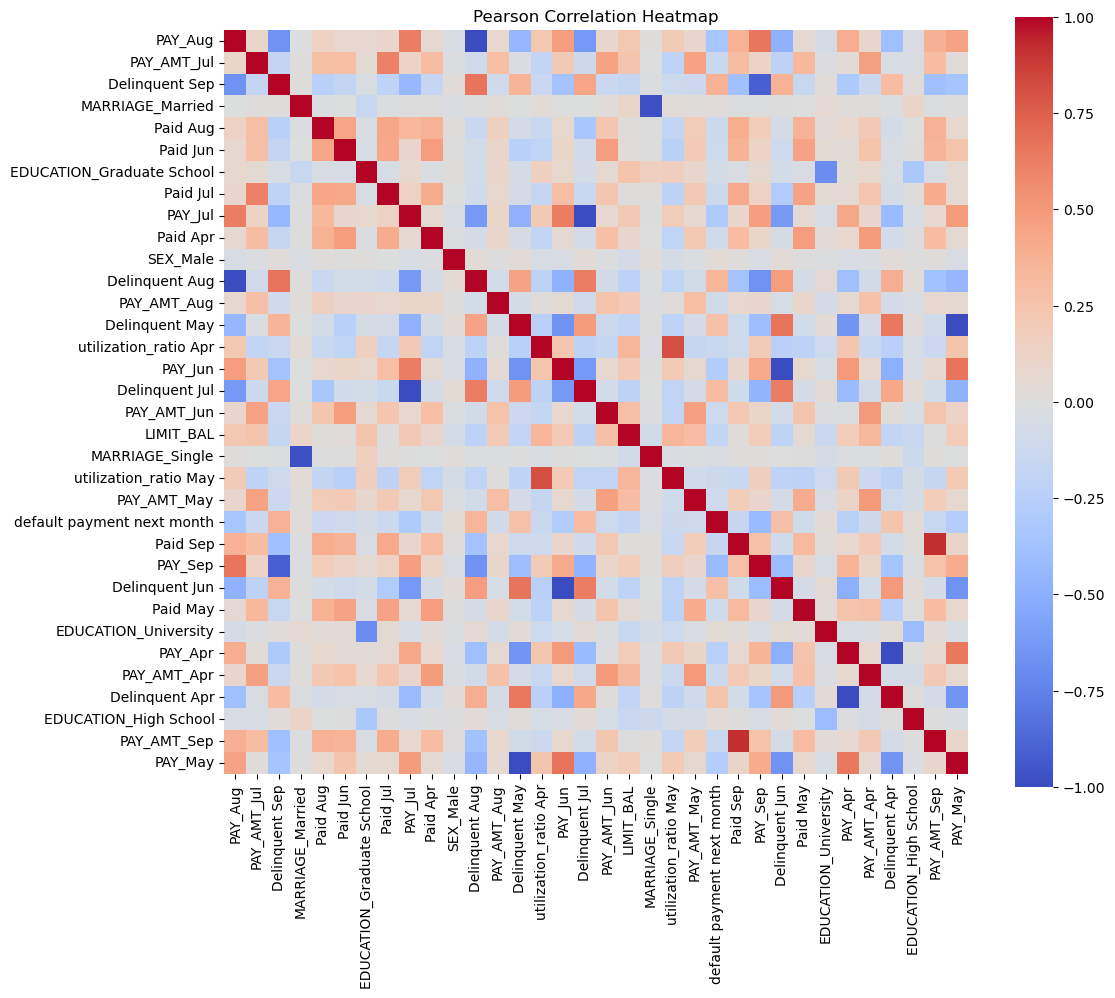

,Feature 1,Feature 2,Correlation,Absolute Correlation
0,Delinquent May,PAY_May,-1.000000,1.000000
1,PAY_Jul,Delinquent Jul,-1.000000,1.000000
2,PAY_Aug,Delinquent Aug,-1.000000,1.000000
3,PAY_Jun,Delinquent Jun,-1.000000,1.000000
4,PAY_Apr,Delinquent Apr,-1.000000,1.000000
5,MARRIAGE_Married,MARRIAGE_Single,-0.978401,0.978401
6,Paid Sep,PAY_AMT_Sep,0.920457,0.920457
7,Delinquent Sep,PAY_Sep,-0.908848,0.908848
8,utilization_ratio Apr,utilization_ratio May,0.816214,0.816214
9,EDUCATION_Graduate School,EDUCATION_University,-0.692711,0.692711


In [71]:
# Assuming df_train is your DataFrame
correlation_table = correlation_summary(df_train_woe)

# View top correlations
correlation_table.head(10)

In [72]:
iv_df

,Feature,IV
0,AGE,0.010283
1,BILL_AMT_Apr,0.004611
2,BILL_AMT_Aug,0.003012
3,BILL_AMT_Jul,0.008554
4,BILL_AMT_Jun,0.001147
5,BILL_AMT_May,0.014649
6,BILL_AMT_Sep,0.005165
7,LIMIT_BAL,0.167481
8,PAY_AMT_Apr,0.090321
9,PAY_AMT_Aug,0.059331


In [73]:
# Step 1: Join IV for Feature 1
correlation_with_iv = correlation_table.merge(
    iv_df.rename(columns={'Feature': 'Feature 1', 'IV': 'IV Feature 1'}),
    on='Feature 1',
    how='left'
)

# Step 2: Join IV for Feature 2
correlation_with_iv = correlation_with_iv.merge(
    iv_df.rename(columns={'Feature': 'Feature 2', 'IV': 'IV Feature 2'}),
    on='Feature 2',
    how='left'
)

# Final output
correlation_with_iv = correlation_with_iv[
    ['Feature 1', 'Feature 2', 'Correlation', 'Absolute Correlation', 'IV Feature 1', 'IV Feature 2']
]

In [74]:
correlation_with_iv

,Feature 1,Feature 2,Correlation,Absolute Correlation,IV Feature 1,IV Feature 2
0,Delinquent May,PAY_May,-1.000000,1.000000,NaN,0.327989
1,PAY_Jul,Delinquent Jul,-1.000000,1.000000,0.434986,NaN
2,PAY_Aug,Delinquent Aug,-1.000000,1.000000,0.569411,NaN
3,PAY_Jun,Delinquent Jun,-1.000000,1.000000,0.366326,NaN
4,PAY_Apr,Delinquent Apr,-1.000000,1.000000,0.281494,NaN
...,...,...,...,...,...,...
556,MARRIAGE_Married,Delinquent Jul,-0.000342,0.000342,NaN,NaN
557,MARRIAGE_Married,PAY_Jul,0.000342,0.000342,NaN,0.434986
558,PAY_Jul,MARRIAGE_Single,0.000233,0.000233,0.434986,NaN
559,Delinquent Jul,MARRIAGE_Single,-0.000233,0.000233,NaN,NaN


In [75]:
high_corr_df = correlation_with_iv[correlation_with_iv['Absolute Correlation'] >= 0.8]

In [76]:
high_corr_df

,Feature 1,Feature 2,Correlation,Absolute Correlation,IV Feature 1,IV Feature 2
0,Delinquent May,PAY_May,-1.000000,1.000000,NaN,0.327989
1,PAY_Jul,Delinquent Jul,-1.000000,1.000000,0.434986,NaN
2,PAY_Aug,Delinquent Aug,-1.000000,1.000000,0.569411,NaN
3,PAY_Jun,Delinquent Jun,-1.000000,1.000000,0.366326,NaN
4,PAY_Apr,Delinquent Apr,-1.000000,1.000000,0.281494,NaN
5,MARRIAGE_Married,MARRIAGE_Single,-0.978401,0.978401,NaN,NaN
6,Paid Sep,PAY_AMT_Sep,0.920457,0.920457,NaN,0.125502
7,Delinquent Sep,PAY_Sep,-0.908848,0.908848,NaN,0.871415
8,utilization_ratio Apr,utilization_ratio May,0.816214,0.816214,0.100997,0.078822


In [77]:
df_train_woe.columns

Index(['PAY_Aug', 'PAY_AMT_Jul', 'Delinquent Sep', 'MARRIAGE_Married',
       'Paid Aug', 'Paid Jun', 'EDUCATION_Graduate School', 'Paid Jul',
       'PAY_Jul', 'Paid Apr', 'SEX_Male', 'Delinquent Aug', 'PAY_AMT_Aug',
       'Delinquent May', 'utilization_ratio Apr', 'PAY_Jun', 'Delinquent Jul',
       'PAY_AMT_Jun', 'LIMIT_BAL', 'MARRIAGE_Single', 'utilization_ratio May',
       'PAY_AMT_May', 'default payment next month', 'Paid Sep', 'PAY_Sep',
       'Delinquent Jun', 'Paid May', 'EDUCATION_University', 'PAY_Apr',
       'PAY_AMT_Apr', 'Delinquent Apr', 'EDUCATION_High School', 'PAY_AMT_Sep',
       'PAY_May'],
      dtype='object')

In [78]:
high_corr_to_drop = ['Delinquent Aug','Delinquent Sep','Delinquent May','Delinquent Apr','Delinquent Jul','Delinquent Jun']

In [79]:
df_train_woe.drop(columns=high_corr_to_drop,inplace= True)

In [80]:
print(df_train_woe.shape)
df_train_woe.head()

(21000, 28)


,PAY_Aug,PAY_AMT_Jul,MARRIAGE_Married,Paid Aug,Paid Jun,EDUCATION_Graduate School,Paid Jul,PAY_Jul,Paid Apr,SEX_Male,...,default payment next month,Paid Sep,PAY_Sep,Paid May,EDUCATION_University,PAY_Apr,PAY_AMT_Apr,EDUCATION_High School,PAY_AMT_Sep,PAY_May
0,0.392536,-0.382178,1,0,0,1,0,0.323462,0,0,...,1,0,0.572969,0,0,0.214400,-0.246391,0,-0.638323,0.227175
1,0.392536,0.253302,0,1,1,1,1,0.323462,1,0,...,0,1,0.572969,1,0,0.214400,0.151753,0,0.198678,0.227175
2,-1.520619,-0.382178,1,1,1,0,0,-1.394027,0,0,...,0,0,-2.093205,1,1,0.214400,-0.246391,0,-0.638323,0.227175
3,-1.520619,-0.382178,1,0,0,0,0,-1.394027,0,0,...,0,0,-2.093205,0,0,-1.343668,-0.246391,1,-0.638323,-1.483083
4,0.392536,-0.029497,1,1,1,1,1,0.323462,1,1,...,0,1,0.572969,1,0,0.214400,0.562881,0,0.198678,0.227175


In [81]:
df_train_woe.columns

Index(['PAY_Aug', 'PAY_AMT_Jul', 'MARRIAGE_Married', 'Paid Aug', 'Paid Jun',
       'EDUCATION_Graduate School', 'Paid Jul', 'PAY_Jul', 'Paid Apr',
       'SEX_Male', 'PAY_AMT_Aug', 'utilization_ratio Apr', 'PAY_Jun',
       'PAY_AMT_Jun', 'LIMIT_BAL', 'MARRIAGE_Single', 'utilization_ratio May',
       'PAY_AMT_May', 'default payment next month', 'Paid Sep', 'PAY_Sep',
       'Paid May', 'EDUCATION_University', 'PAY_Apr', 'PAY_AMT_Apr',
       'EDUCATION_High School', 'PAY_AMT_Sep', 'PAY_May'],
      dtype='object')

# Feature Selection: Train Data

In [82]:
X_train = df_train_woe.drop(columns='default payment next month')
y_train = df_train_woe['default payment next month']

In [83]:
import statsmodels.api as sm
import pandas as pd

def backward_elimination(X, y, significance_level=0.05, verbose=True):
    """
    Perform backward feature elimination based on p-values.

    Parameters:
    - X: DataFrame of features
    - y: Series or array-like target
    - significance_level: p-value threshold for retaining features
    - verbose: if True, prints elimination steps

    Returns:
    - selected_features: list of features retained
    - final_model: fitted statsmodels regression model
    """
    X_ = X.copy()
    X_ = sm.add_constant(X_)  # add intercept
    features = list(X_.columns)

    while True:
        model = sm.OLS(y, X_).fit()  # Use sm.Logit for logistic regression
        pvalues = model.pvalues
        max_pval = pvalues.drop('const').max()
        if max_pval > significance_level:
            excluded_feature = pvalues.drop('const').idxmax()
            if verbose:
                print(f"Dropping '{excluded_feature}' with p-value {max_pval:.4f}")
            X_.drop(columns=excluded_feature, inplace=True)
            features.remove(excluded_feature)
        else:
            break

    final_model = sm.OLS(y, X_).fit()
    return features, final_model

In [84]:
# Assuming you have:
# X = your feature dataframe (after one-hot encoding)
# y = your target variable

selected_features, final_model = backward_elimination(X_train, y_train)

# Print final retained features
print("Selected features:", selected_features)

# View summary
print(final_model.summary())


Dropping 'PAY_AMT_May' with p-value 0.9890
Dropping 'MARRIAGE_Married' with p-value 0.8315
Dropping 'Paid Aug' with p-value 0.6801
Dropping 'PAY_AMT_Sep' with p-value 0.4750
Dropping 'Paid May' with p-value 0.4425
Dropping 'Paid Apr' with p-value 0.5024
Dropping 'utilization_ratio May' with p-value 0.0925
Dropping 'PAY_May' with p-value 0.0579
Dropping 'Paid Jul' with p-value 0.0905
Selected features: ['const', 'PAY_Aug', 'PAY_AMT_Jul', 'Paid Jun', 'EDUCATION_Graduate School', 'PAY_Jul', 'SEX_Male', 'PAY_AMT_Aug', 'utilization_ratio Apr', 'PAY_Jun', 'PAY_AMT_Jun', 'LIMIT_BAL', 'MARRIAGE_Single', 'Paid Sep', 'PAY_Sep', 'EDUCATION_University', 'PAY_Apr', 'PAY_AMT_Apr', 'EDUCATION_High School']
                                OLS Regression Results                                
Dep. Variable:     default payment next month   R-squared:                       0.214
Model:                                    OLS   Adj. R-squared:                  0.213
Method:                         Least 

In [85]:
selected_features

['const',
 'PAY_Aug',
 'PAY_AMT_Jul',
 'Paid Jun',
 'EDUCATION_Graduate School',
 'PAY_Jul',
 'SEX_Male',
 'PAY_AMT_Aug',
 'utilization_ratio Apr',
 'PAY_Jun',
 'PAY_AMT_Jun',
 'LIMIT_BAL',
 'MARRIAGE_Single',
 'Paid Sep',
 'PAY_Sep',
 'EDUCATION_University',
 'PAY_Apr',
 'PAY_AMT_Apr',
 'EDUCATION_High School']

In [86]:
len(selected_features) - 1

18

# Feature Engineering: Test Data

In [87]:
df_temp = df_test.copy()

In [88]:
print(df_temp.shape)
df_temp.head()

(9000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2308,2309,30000,1,2,2,25,0,0,0,0,...,12580,13716,14828,1500,2000,1500,1500,1500,2000,0
22404,22405,150000,2,1,2,26,0,0,0,0,...,101581,77741,77264,4486,4235,3161,2647,2669,2669,0
23397,23398,70000,2,3,1,32,0,0,0,0,...,69753,70111,70212,2431,3112,3000,2438,2500,2554,0
25058,25059,130000,1,3,2,49,0,0,0,0,...,16898,11236,6944,1610,1808,7014,27,7011,4408,0
2664,2665,50000,2,2,2,36,0,0,0,0,...,19574,20295,19439,2000,1500,1000,1800,0,1000,1


In [89]:
df_temp.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default payment next month'], dtype=object)

In [90]:
months_info = [
    ('Sep', 'PAY_0', 'BILL_AMT1', 'PAY_AMT1'),
    ('Aug', 'PAY_2', 'BILL_AMT2', 'PAY_AMT2'),
    ('Jul', 'PAY_3', 'BILL_AMT3', 'PAY_AMT3'),
    ('Jun', 'PAY_4', 'BILL_AMT4', 'PAY_AMT4'),
    ('May', 'PAY_5', 'BILL_AMT5', 'PAY_AMT5'),
    ('Apr', 'PAY_6', 'BILL_AMT6', 'PAY_AMT6'),
]

In [91]:
def generate_monthly_features(df,months_info):
    
    dfs = []
    
    for month,pay_col,bill_col,pay_amt_col in months_info:
        temp_df = df[['ID','LIMIT_BAL',pay_col,bill_col,pay_amt_col]].copy()
        
        temp_df[f'utilization_ratio {month}'] = temp_df[bill_col]/temp_df['LIMIT_BAL']

        temp_df[f'Paid {month}'] = np.where(temp_df[pay_amt_col] > 0, 1,0)

        temp_df[f'Delinquent {month}'] = np.where(temp_df[pay_col] >= 1, 1,0)
        
        keep_cols = ['ID',f'utilization_ratio {month}',f'Paid {month}',f'Delinquent {month}']
        
        dfs.append(temp_df[keep_cols])
    
    for temp_df in dfs:
        df = pd.merge(df,temp_df,on='ID',how='inner')
            
    return df

In [92]:
df_temp = generate_monthly_features(df_temp, months_info)

In [93]:
df_temp.rename(columns={'PAY_0':'PAY_Sep','PAY_2':'PAY_Aug','PAY_3':'PAY_Jul','PAY_4':'PAY_Jun','PAY_5':'PAY_May','PAY_6':'PAY_Apr'},inplace= True)

In [94]:
df_temp.rename(columns={'BILL_AMT1':'BILL_AMT_Sep','BILL_AMT2':'BILL_AMT_Aug','BILL_AMT3':'BILL_AMT_Jul','BILL_AMT4':'BILL_AMT_Jun','BILL_AMT5':'BILL_AMT_May','BILL_AMT6':'BILL_AMT_Apr'},inplace= True)

In [95]:
df_temp.rename(columns={'PAY_AMT1':'PAY_AMT_Sep','PAY_AMT2':'PAY_AMT_Aug','PAY_AMT3':'PAY_AMT_Jul','PAY_AMT4':'PAY_AMT_Jun','PAY_AMT5':'PAY_AMT_May','PAY_AMT6':'PAY_AMT_Apr'},inplace= True)

In [96]:
df_temp.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_Sep', 'PAY_Aug', 'PAY_Jul', 'PAY_Jun', 'PAY_May', 'PAY_Apr',
       'BILL_AMT_Sep', 'BILL_AMT_Aug', 'BILL_AMT_Jul', 'BILL_AMT_Jun',
       'BILL_AMT_May', 'BILL_AMT_Apr', 'PAY_AMT_Sep', 'PAY_AMT_Aug',
       'PAY_AMT_Jul', 'PAY_AMT_Jun', 'PAY_AMT_May', 'PAY_AMT_Apr',
       'default payment next month', 'utilization_ratio Sep', 'Paid Sep',
       'Delinquent Sep', 'utilization_ratio Aug', 'Paid Aug',
       'Delinquent Aug', 'utilization_ratio Jul', 'Paid Jul',
       'Delinquent Jul', 'utilization_ratio Jun', 'Paid Jun',
       'Delinquent Jun', 'utilization_ratio May', 'Paid May',
       'Delinquent May', 'utilization_ratio Apr', 'Paid Apr',
       'Delinquent Apr'], dtype=object)

In [97]:
def reorder_columns_monthwise(df):
    base_cols = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']
    target_col = ['default payment next month']
    
    months = ['Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr']
    ordered_month_cols = []

    for month in months:
        for prefix in ['PAY', 'BILL_AMT', 'PAY_AMT', 'utilization_ratio', 'Paid', 'Delinquent']:
            col_name = f'{prefix} {month}' if prefix in ['utilization_ratio', 'Paid', 'Delinquent'] else f'{prefix}_{month}'
            if col_name in df.columns:
                ordered_month_cols.append(col_name)

    new_order = base_cols + ordered_month_cols + target_col
    return df[new_order]

In [98]:
df_temp = reorder_columns_monthwise(df_temp)

In [99]:
df_temp.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_Sep', 'BILL_AMT_Sep', 'PAY_AMT_Sep', 'utilization_ratio Sep',
       'Paid Sep', 'Delinquent Sep', 'PAY_Aug', 'BILL_AMT_Aug',
       'PAY_AMT_Aug', 'utilization_ratio Aug', 'Paid Aug',
       'Delinquent Aug', 'PAY_Jul', 'BILL_AMT_Jul', 'PAY_AMT_Jul',
       'utilization_ratio Jul', 'Paid Jul', 'Delinquent Jul', 'PAY_Jun',
       'BILL_AMT_Jun', 'PAY_AMT_Jun', 'utilization_ratio Jun', 'Paid Jun',
       'Delinquent Jun', 'PAY_May', 'BILL_AMT_May', 'PAY_AMT_May',
       'utilization_ratio May', 'Paid May', 'Delinquent May', 'PAY_Apr',
       'BILL_AMT_Apr', 'PAY_AMT_Apr', 'utilization_ratio Apr', 'Paid Apr',
       'Delinquent Apr', 'default payment next month'], dtype=object)

In [100]:
df_temp['EDUCATION'].value_counts(dropna= False)

2    4234
1    3152
3    1473
5      85
4      38
6      13
0       5
Name: EDUCATION, dtype: int64

In [101]:
df_temp['EDUCATION'] = np.where(df_temp['EDUCATION'] == 0, mode_education_train,df_temp['EDUCATION'])

In [102]:
education_mapping = {
    1: 'Graduate School',
    2: 'University',
    3: 'High School',
    4: "Others",
    5: "Others",
    6: "Others"
}

df_temp['EDUCATION'] = df_temp['EDUCATION'].map(education_mapping)

In [103]:
df_temp['EDUCATION'].value_counts(dropna= False)

University         4239
Graduate School    3152
High School        1473
Others              136
Name: EDUCATION, dtype: int64

In [104]:
df_temp['SEX'].value_counts(dropna= False)

2    5388
1    3612
Name: SEX, dtype: int64

In [105]:
gender_mapping = {
    1: 'Male',
    2: 'Female'
}

df_temp['SEX'] = df_temp['SEX'].map(gender_mapping)

In [106]:
df_temp['SEX'].value_counts(dropna= False)

Female    5388
Male      3612
Name: SEX, dtype: int64

In [107]:
df_temp['MARRIAGE'].value_counts(dropna= False)

2    4832
1    4054
3      95
0      19
Name: MARRIAGE, dtype: int64

In [108]:
df_temp['MARRIAGE'] = np.where(df_temp['MARRIAGE'] == 0,2,df_temp['MARRIAGE'])

In [109]:
df_temp['MARRIAGE'].value_counts(dropna= False)

2    4851
1    4054
3      95
Name: MARRIAGE, dtype: int64

In [110]:
marital_mapping = {
    1: 'Married',
    2: 'Single',
    3: 'Others'
}

df_temp['MARRIAGE'] = df_temp['MARRIAGE'].map(marital_mapping)

In [111]:
df_temp['MARRIAGE'].value_counts(dropna= False)

Single     4851
Married    4054
Others       95
Name: MARRIAGE, dtype: int64

In [112]:
df_temp.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_Sep                       0
BILL_AMT_Sep                  0
PAY_AMT_Sep                   0
utilization_ratio Sep         0
Paid Sep                      0
Delinquent Sep                0
PAY_Aug                       0
BILL_AMT_Aug                  0
PAY_AMT_Aug                   0
utilization_ratio Aug         0
Paid Aug                      0
Delinquent Aug                0
PAY_Jul                       0
BILL_AMT_Jul                  0
PAY_AMT_Jul                   0
utilization_ratio Jul         0
Paid Jul                      0
Delinquent Jul                0
PAY_Jun                       0
BILL_AMT_Jun                  0
PAY_AMT_Jun                   0
utilization_ratio Jun         0
Paid Jun                      0
Delinquent Jun                0
PAY_May                       0
BILL_AMT

In [113]:
df_temp.shape

(9000, 43)

In [114]:
# One-hot encoding without dropping any columns
df_temp = pd.get_dummies(df_temp, columns=['EDUCATION', 'SEX','MARRIAGE'], drop_first=False)

In [115]:
df_temp.columns.values

array(['ID', 'LIMIT_BAL', 'AGE', 'PAY_Sep', 'BILL_AMT_Sep', 'PAY_AMT_Sep',
       'utilization_ratio Sep', 'Paid Sep', 'Delinquent Sep', 'PAY_Aug',
       'BILL_AMT_Aug', 'PAY_AMT_Aug', 'utilization_ratio Aug', 'Paid Aug',
       'Delinquent Aug', 'PAY_Jul', 'BILL_AMT_Jul', 'PAY_AMT_Jul',
       'utilization_ratio Jul', 'Paid Jul', 'Delinquent Jul', 'PAY_Jun',
       'BILL_AMT_Jun', 'PAY_AMT_Jun', 'utilization_ratio Jun', 'Paid Jun',
       'Delinquent Jun', 'PAY_May', 'BILL_AMT_May', 'PAY_AMT_May',
       'utilization_ratio May', 'Paid May', 'Delinquent May', 'PAY_Apr',
       'BILL_AMT_Apr', 'PAY_AMT_Apr', 'utilization_ratio Apr', 'Paid Apr',
       'Delinquent Apr', 'default payment next month',
       'EDUCATION_Graduate School', 'EDUCATION_High School',
       'EDUCATION_Others', 'EDUCATION_University', 'SEX_Female',
       'SEX_Male', 'MARRIAGE_Married', 'MARRIAGE_Others',
       'MARRIAGE_Single'], dtype=object)

In [116]:
#Columns to drop for multi-collinearity
col_to_drop = ['EDUCATION_Others','SEX_Female','MARRIAGE_Others']

In [117]:
df_temp.drop(columns= col_to_drop, inplace= True)

In [118]:
df_test = df_temp.copy()

In [119]:
print(df_test.shape)
df_test.head()

(9000, 46)


,ID,LIMIT_BAL,AGE,PAY_Sep,BILL_AMT_Sep,PAY_AMT_Sep,utilization_ratio Sep,Paid Sep,Delinquent Sep,PAY_Aug,...,utilization_ratio Apr,Paid Apr,Delinquent Apr,default payment next month,EDUCATION_Graduate School,EDUCATION_High School,EDUCATION_University,SEX_Male,MARRIAGE_Married,MARRIAGE_Single
0,2309,30000,25,0,8864,1500,0.295467,1,0,0,...,0.494267,1,0,0,0,0,1,1,0,1
1,22405,150000,26,0,136736,4486,0.911573,1,0,0,...,0.515093,1,0,0,1,0,0,0,0,1
2,23398,70000,32,0,70122,2431,1.001743,1,0,0,...,1.003029,1,0,0,0,1,0,0,1,0
3,25059,130000,49,0,20678,1610,0.159062,1,0,0,...,0.053415,1,0,0,0,1,0,1,0,1
4,2665,50000,36,0,94228,2000,1.884560,1,0,0,...,0.388780,1,1,1,0,0,1,0,0,1


In [120]:
df_test.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'PAY_Sep', 'BILL_AMT_Sep', 'PAY_AMT_Sep',
       'utilization_ratio Sep', 'Paid Sep', 'Delinquent Sep', 'PAY_Aug',
       'BILL_AMT_Aug', 'PAY_AMT_Aug', 'utilization_ratio Aug', 'Paid Aug',
       'Delinquent Aug', 'PAY_Jul', 'BILL_AMT_Jul', 'PAY_AMT_Jul',
       'utilization_ratio Jul', 'Paid Jul', 'Delinquent Jul', 'PAY_Jun',
       'BILL_AMT_Jun', 'PAY_AMT_Jun', 'utilization_ratio Jun', 'Paid Jun',
       'Delinquent Jun', 'PAY_May', 'BILL_AMT_May', 'PAY_AMT_May',
       'utilization_ratio May', 'Paid May', 'Delinquent May', 'PAY_Apr',
       'BILL_AMT_Apr', 'PAY_AMT_Apr', 'utilization_ratio Apr', 'Paid Apr',
       'Delinquent Apr', 'default payment next month',
       'EDUCATION_Graduate School', 'EDUCATION_High School',
       'EDUCATION_University', 'SEX_Male', 'MARRIAGE_Married',
       'MARRIAGE_Single'],
      dtype='object')

In [121]:
import pandas as pd
import numpy as np
import re

def parse_interval(interval_str):
    """Parse a string like '(30000.0, 140000.0]' into a pd.Interval."""
    if not isinstance(interval_str, str):
        return np.nan
    match = re.match(r'[\[\(]([-\d\.]+),\s*([-\d\.]+)[\]\)]', interval_str)
    if match:
        left = float(match.group(1))
        right = float(match.group(2))
        closed = 'right' if interval_str.endswith(']') else 'left'
        return pd.Interval(left, right, closed=closed)
    return np.nan

def apply_woe_binning(df, woe_temp):
    df_transformed = df.copy()

    for feature in woe_temp['Feature'].unique():
        if feature not in df_transformed.columns:
            continue

        feature_woe = woe_temp[woe_temp['Feature'] == feature].copy()
        feature_woe['bin'] = feature_woe['bin'].astype(str)

        is_interval = feature_woe['bin'].str.contains(r'[\[\(].*,.*[\]\)]').any()

        if is_interval:
            intervals = feature_woe['bin'].apply(parse_interval)
            valid = intervals.notna()
            cut_intervals = pd.IntervalIndex(intervals[valid])
            woe_map = dict(zip(cut_intervals, feature_woe.loc[valid, 'WoE']))

            def map_with_outliers(x):
                for interval in cut_intervals:
                    if x in interval:
                        return woe_map[interval]
                # Handle out-of-range values
                if pd.notna(x):
                    if x < cut_intervals.left.min():
                        return woe_map[cut_intervals[0]]  # WoE of leftmost bin
                    elif x > cut_intervals.right.max():
                        return woe_map[cut_intervals[-1]]  # WoE of rightmost bin
                return np.nan

            df_transformed[feature] = df_transformed[feature].apply(map_with_outliers)

        else:
            # Map exact match bins (e.g., for categorical values)
            woe_map = dict(zip(feature_woe['bin'], feature_woe['WoE']))
            df_transformed[feature] = df_transformed[feature].map(woe_map)

    return df_transformed


In [122]:
df_test_woe = apply_woe_binning(df_test, woe_temp)

In [123]:
df_test_woe.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'PAY_Sep', 'BILL_AMT_Sep', 'PAY_AMT_Sep',
       'utilization_ratio Sep', 'Paid Sep', 'Delinquent Sep', 'PAY_Aug',
       'BILL_AMT_Aug', 'PAY_AMT_Aug', 'utilization_ratio Aug', 'Paid Aug',
       'Delinquent Aug', 'PAY_Jul', 'BILL_AMT_Jul', 'PAY_AMT_Jul',
       'utilization_ratio Jul', 'Paid Jul', 'Delinquent Jul', 'PAY_Jun',
       'BILL_AMT_Jun', 'PAY_AMT_Jun', 'utilization_ratio Jun', 'Paid Jun',
       'Delinquent Jun', 'PAY_May', 'BILL_AMT_May', 'PAY_AMT_May',
       'utilization_ratio May', 'Paid May', 'Delinquent May', 'PAY_Apr',
       'BILL_AMT_Apr', 'PAY_AMT_Apr', 'utilization_ratio Apr', 'Paid Apr',
       'Delinquent Apr', 'default payment next month',
       'EDUCATION_Graduate School', 'EDUCATION_High School',
       'EDUCATION_University', 'SEX_Male', 'MARRIAGE_Married',
       'MARRIAGE_Single'],
      dtype='object')

In [124]:
df_test_woe['BILL_AMT_Apr'].value_counts(dropna= False)

-0.054388    5385
 0.084808    3615
Name: BILL_AMT_Apr, dtype: int64

In [125]:
df[df['ID']==291]['BILL_AMT6']

290   -339603
Name: BILL_AMT6, dtype: int64

In [126]:
woe_temp[woe_temp['Feature']== 'BILL_AMT_Apr']

,Feature,bin,Total Observations,Non events,Events,% of Non events,% of Events,WoE,IV
67,BILL_AMT_Apr,"(-209051.001, 8791.2]",8400,6650,1750,0.407376,0.374251,0.084808,0.002809
68,BILL_AMT_Apr,"(8791.2, 961664.0]",12600,9674,2926,0.592624,0.625749,-0.054388,0.001802


In [127]:
df_test_woe.isna().sum()

ID                            0
LIMIT_BAL                     0
AGE                           0
PAY_Sep                       0
BILL_AMT_Sep                  0
PAY_AMT_Sep                   0
utilization_ratio Sep         0
Paid Sep                      0
Delinquent Sep                0
PAY_Aug                       0
BILL_AMT_Aug                  0
PAY_AMT_Aug                   0
utilization_ratio Aug         0
Paid Aug                      0
Delinquent Aug                0
PAY_Jul                       0
BILL_AMT_Jul                  0
PAY_AMT_Jul                   0
utilization_ratio Jul         0
Paid Jul                      0
Delinquent Jul                0
PAY_Jun                       0
BILL_AMT_Jun                  0
PAY_AMT_Jun                   0
utilization_ratio Jun         0
Paid Jun                      0
Delinquent Jun                0
PAY_May                       0
BILL_AMT_May                  0
PAY_AMT_May                   0
utilization_ratio May         0
Paid May

# Final Feature Selection: Train and Test

In [128]:
X_test = df_test_woe.drop(columns='default payment next month')
y_test = df_test_woe['default payment next month']

In [129]:
selected_features.remove('const')

In [130]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [131]:
print(X_train_selected.shape)
print(X_test_selected.shape)

(21000, 18)
(9000, 18)


In [132]:
target = 'default payment next month'

In [133]:
round(df_train[target].value_counts(dropna = False, normalize = True)[1]*100,2)

22.27

# Model Development

In [134]:
def Bad_rate_infp(df_train,df_test,target):
    obs_train = len(df_train)
    obs_test = len(df_test)
    bad_rate_train = round(df_train[target].value_counts(dropna = False, normalize = True)[1]*100,2)
    bad_rate_test = round(df_test[target].value_counts(dropna = False, normalize = True)[1]*100,2)
    
    result = {
        'Sample': ['Train','Test'],
        '#Observations': [obs_train,obs_test],
        '%Bad': [bad_rate_train,bad_rate_test]
    }
    
    summary = pd.DataFrame(result)
    
    return summary
    

In [135]:
Bad_rate_infp(df_train,df_test,'default payment next month')

,Sample,#Observations,%Bad
0,Train,21000,22.27
1,Test,9000,21.78


In [136]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

def logit_model_report(X_train_selected, y_train, X_test_selected, y_test):
    # Add constant
    X_train_const = sm.add_constant(X_train_selected)
    X_test_const = sm.add_constant(X_test_selected)

    # Fit logistic regression
    model = sm.Logit(y_train, X_train_const)
    result = model.fit()

    # VIF calculation
    vif = pd.Series(
        [variance_inflation_factor(X_train_const.values, i) for i in range(X_train_const.shape[1])],
        index=X_train_const.columns,
        name='VIF'
    ).round(2)

    # Extract model summary with VIF
    summary_df = result.summary2().tables[1].copy()
    summary_df['VIF'] = vif[summary_df.index]

    # Print header and results
    print(result.summary().tables[0])
    print("=" * 100)
    print(summary_df.to_string())

    # Predict on test data
    y_pred_prob = result.predict(X_test_const)
    y_pred = (y_pred_prob >= 0.5).astype(int)

    # Classification metrics
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=4))

    print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Test AUC Score: {roc_auc_score(y_test, y_pred_prob):.4f}")

    return result,summary_df


In [137]:
result,summary_with_vif = logit_model_report(X_train_selected, y_train, X_test_selected, y_test)

# View summary with VIF
print(summary_with_vif)

Optimization terminated successfully.
         Current function value: 0.434238
         Iterations 7
                               Logit Regression Results                               
Dep. Variable:     default payment next month   No. Observations:                21000
Model:                                  Logit   Df Residuals:                    20981
Method:                                   MLE   Df Model:                           18
Date:                        Sun, 22 Jun 2025   Pseudo R-squ.:                  0.1811
Time:                                19:42:35   Log-Likelihood:                -9119.0
converged:                               True   LL-Null:                       -11136.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                              Coef.  Std.Err.          z          P>|z|    [0.025    0.975]    VIF
const                     -1.743044  0.220519  -7.904295   2.694539e-15 -2.175253 -1.310836  76.12
PAY_

In [138]:
cols_to_drop_high_vif = ['PAY_Aug','PAY_Jun','EDUCATION_High School','EDUCATION_University','EDUCATION_Graduate School']

X_train_selected.drop(columns= cols_to_drop_high_vif, inplace= True)
X_test_selected.drop(columns=cols_to_drop_high_vif, inplace= True)

In [139]:
print(X_train_selected.shape)
print(X_test_selected.shape)

(21000, 13)
(9000, 13)


In [140]:
result,summary_with_vif = logit_model_report(X_train_selected, y_train, X_test_selected, y_test)

# View summary with VIF
print(summary_with_vif)

Optimization terminated successfully.
         Current function value: 0.435014
         Iterations 6
                               Logit Regression Results                               
Dep. Variable:     default payment next month   No. Observations:                21000
Model:                                  Logit   Df Residuals:                    20986
Method:                                   MLE   Df Model:                           13
Date:                        Sun, 22 Jun 2025   Pseudo R-squ.:                  0.1796
Time:                                19:42:35   Log-Likelihood:                -9135.3
converged:                               True   LL-Null:                       -11136.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                          Coef.  Std.Err.          z          P>|z|    [0.025    0.975]    VIF
const                 -0.827585  0.056168 -14.734134   3.891562e-49 -0.937672 -0.717498  10.82
PAY_AMT_Jul 

In [141]:
# Predict probabilities and labels
y_train_pred_prob = result.predict(sm.add_constant(X_train_selected))
y_test_pred_prob = result.predict(sm.add_constant(X_test_selected))

y_train_pred_label = (y_train_pred_prob >= 0.5).astype(int)
y_test_pred_label = (y_test_pred_prob >= 0.5).astype(int)

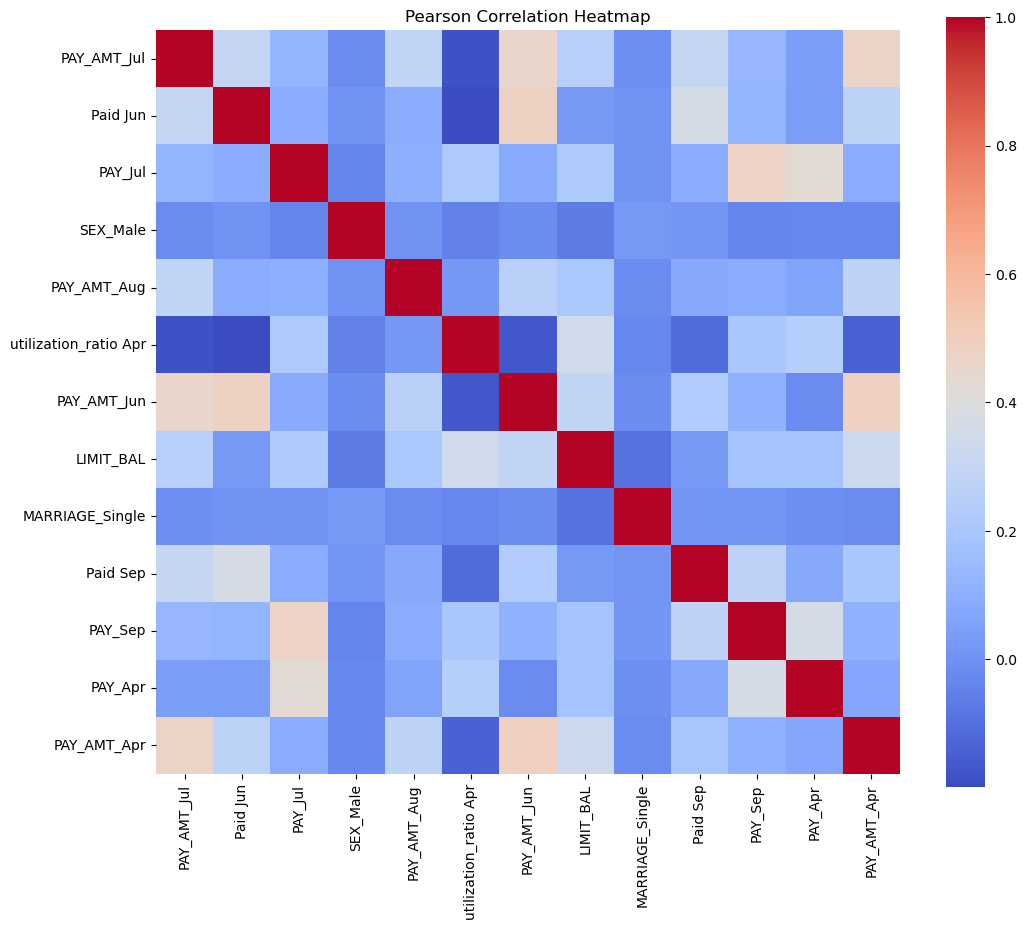

,Feature 1,Feature 2,Correlation,Absolute Correlation
0,PAY_AMT_Jun,PAY_AMT_Apr,0.498851,0.498851
1,Paid Jun,PAY_AMT_Jun,0.482982,0.482982
2,PAY_Jul,PAY_Sep,0.476032,0.476032
3,PAY_AMT_Jul,PAY_AMT_Apr,0.466896,0.466896
4,PAY_AMT_Jul,PAY_AMT_Jun,0.458772,0.458772
...,...,...,...,...
73,PAY_AMT_Jul,MARRIAGE_Single,-0.007223,0.007223
74,SEX_Male,PAY_AMT_Aug,0.005002,0.005002
75,Paid Jun,MARRIAGE_Single,0.004265,0.004265
76,Paid Jun,SEX_Male,0.003859,0.003859


In [142]:
correlation_summary(X_train_selected)

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_lorenz_curve_train_test(y_train, y_train_scores, y_test, y_test_scores):
    """
    Plot Lorenz curves for both Train and Test datasets on the same plot.
    
    Parameters:
        y_train: true labels (train)
        y_train_scores: predicted probs/scores (train)
        y_test: true labels (test)
        y_test_scores: predicted probs/scores (test)
    """

    def prepare_lorenz_data(y_true, y_scores):
        df = pd.DataFrame({'y_true': y_true, 'y_score': y_scores})
        df.sort_values(by='y_score', ascending=False, inplace=True)
        df['population_pct'] = np.arange(1, len(df) + 1) / len(df)
        total_bads = df['y_true'].sum()
        df['cum_bads'] = df['y_true'].cumsum()
        df['cum_bads_pct'] = df['cum_bads'] / total_bads
        return df['population_pct'], df['cum_bads_pct']

    train_x, train_y = prepare_lorenz_data(y_train, y_train_scores)
    test_x, test_y = prepare_lorenz_data(y_test, y_test_scores)

    plt.figure(figsize=(8, 6))
    plt.plot(train_x, train_y, label='Train Lorenz Curve', color='lightblue', linewidth=2)
    plt.plot(test_x, test_y, label='Test Lorenz Curve', color='#FFB347', linewidth=2)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Model')

    plt.xlabel('Cumulative % of Population')
    plt.ylabel('Cumulative % of Defaults')
    plt.title('Lorenz Curve: Train vs Test')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


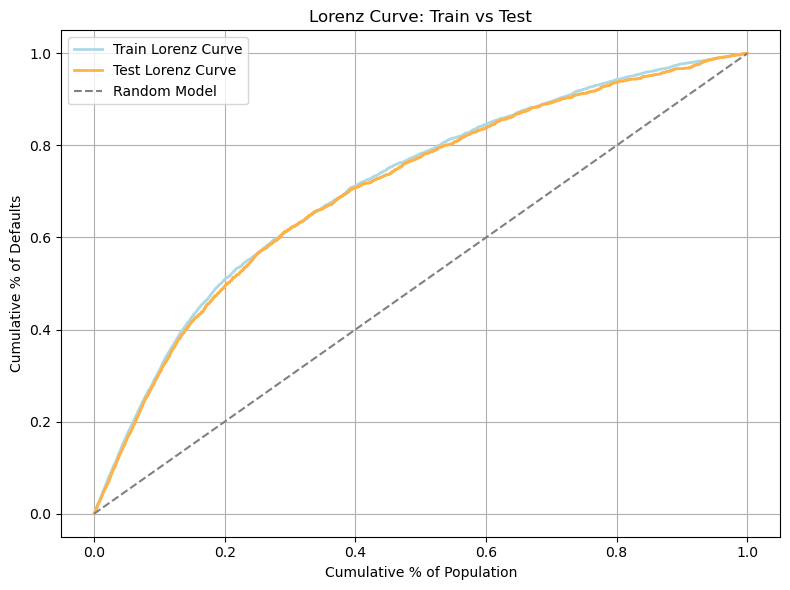

In [144]:
plot_lorenz_curve_train_test(y_train, y_train_pred_prob, y_test, y_test_pred_prob)

In [145]:
from sklearn.metrics import roc_auc_score, accuracy_score
import pandas as pd

def evaluate_model_performance(y_train, y_train_pred_prob, y_train_pred_label,
                                y_test, y_test_pred_prob, y_test_pred_label):
    """
    Compute AUC, Gini, and Accuracy for Train and Test sets.
    
    Returns:
        pandas DataFrame with columns: Sample | AUC | Gini | Accuracy
    """

    def compute_metrics(y_true, y_prob, y_pred):
        auc = roc_auc_score(y_true, y_prob)
        gini = 2 * auc - 1
        acc = accuracy_score(y_true, y_pred)
        return auc, gini, acc

    train_auc, train_gini, train_acc = compute_metrics(y_train, y_train_pred_prob, y_train_pred_label)
    test_auc, test_gini, test_acc = compute_metrics(y_test, y_test_pred_prob, y_test_pred_label)

    result_df = pd.DataFrame({
        'Sample': ['Train', 'Test'],
        'AUC': [train_auc, test_auc],
        'Gini': [train_gini, test_gini],
        'Accuracy': [train_acc, test_acc]
    })

    return result_df

In [146]:
# Evaluate
evaluate_model_performance(
    y_train, y_train_pred_prob, y_train_pred_label,
    y_test, y_test_pred_prob, y_test_pred_label
)


,Sample,AUC,Gini,Accuracy
0,Train,0.772764,0.545529,0.819333
1,Test,0.763242,0.526485,0.816111


In [147]:
import pandas as pd
import numpy as np

def calculate_ks_table(y_true, y_pred, n_groups=10):
    """
    Calculate KS statistic table from actual outcomes and predicted probabilities.
    
    Args:
        y_true: Array of actual binary outcomes (0 or 1), shape (n_samples,)
        y_pred: Array of predicted probabilities (0 to 1), shape (n_samples,)
        n_groups: Number of groups to split the data into (default 10)
        
    Returns:
        DataFrame with KS statistics and performance metrics by group
    """
    # Convert to numpy arrays and validate
    y_true = np.asarray(y_true).flatten()
    y_pred = np.asarray(y_pred).flatten()
    
    # Input validation
    if len(y_true) != len(y_pred):
        raise ValueError(f"Length mismatch: y_true has {len(y_true)} samples, y_pred has {len(y_pred)}")
    if not ((y_pred >= 0) & (y_pred <= 1)).all():
        raise ValueError("Predicted probabilities must be between 0 and 1")
    if not np.isin(y_true, [0, 1]).all():
        raise ValueError("Actual values must be binary (0 or 1)")
    
    # Create dataframe
    df = pd.DataFrame({
        'predicted': y_pred,
        'actual': y_true
    })
    
    # Rank by predicted probability (descending - higher risk first)
    df['rank'] = df['predicted'].rank(ascending=False, method='first')
    
    # Create groups (handle duplicates if they exist)
    df['group'] = pd.qcut(df['rank'], n_groups, duplicates='drop')
    
    # Calculate group statistics
    grouped = df.groupby('group')
    
    # Initialize results dataframe
    results = pd.DataFrame({
        'Predicted Group': range(n_groups),
        'Total Apps': grouped.size(),
        'Bad Counts': grouped['actual'].sum(),  # Assuming 1=bad
        'Good Counts': grouped.size() - grouped['actual'].sum()
    })
    
    # Add prediction statistics
    results['Minimum Predicted'] = grouped['predicted'].min()
    results['Maximum Predicted'] = grouped['predicted'].max()
    results['Average Predicted'] = grouped['predicted'].mean()
    results['Error Actual'] = grouped['actual'].mean()
    
    # Calculate percentages
    total_bad = df['actual'].sum()
    total_good = len(df) - total_bad
    
    results['Bad %'] = results['Bad Counts'] / total_bad * 100
    results['Good %'] = results['Good Counts'] / total_good * 100
    
    # Cumulative percentages
    results['Cumulative Bad %'] = results['Bad %'].cumsum()
    results['Cumulative Good %'] = results['Good %'].cumsum()
    
    # KS statistic
    results['KS'] = abs(results['Cumulative Good %'] - results['Cumulative Bad %'])
    
    # Rankings
    results['Predicted Rank'] = range(1, n_groups+1)
    results['Actual Rank'] = range(1, n_groups+1)
    
    # Format percentages
    pct_cols = ['Bad %', 'Good %', 'Cumulative Bad %', 'Cumulative Good %', 'KS']
    results[pct_cols] = results[pct_cols].round(2)
    
    results.reset_index(inplace= True)
    results.drop(columns='Predicted Group', inplace= True)
    
    results.rename(columns={'group':'Predicted Group'}, inplace= True)
    results['Rank Order Break'] = np.where(results['Predicted Rank'] != results['Actual Rank'],1,0)
    
    return results

In [148]:
# Example usage:
ks_table_train = calculate_ks_table(y_train, y_train_pred_prob)

In [149]:
ks_table_train

,Predicted Group,Total Apps,Bad Counts,Good Counts,Minimum Predicted,Maximum Predicted,Average Predicted,Error Actual,Bad %,Good %,Cumulative Bad %,Cumulative Good %,KS,Predicted Rank,Actual Rank,Rank Order Break
0,"(0.999, 2100.9]",2100,1457,643,0.552087,0.920127,0.710396,0.693810,31.16,3.94,31.16,3.94,27.22,1,1,0
1,"(2100.9, 4200.8]",2100,925,1175,0.314424,0.551824,0.417500,0.440476,19.78,7.20,50.94,11.14,39.80,2,2,0
2,"(4200.8, 6300.7]",2100,516,1584,0.203787,0.314424,0.245397,0.245714,11.04,9.70,61.98,20.84,41.14,3,3,0
3,"(6300.7, 8400.6]",2100,434,1666,0.168480,0.203787,0.184731,0.206667,9.28,10.21,71.26,31.05,40.21,4,4,0
4,"(8400.6, 10500.5]",2100,329,1771,0.144714,0.168480,0.155863,0.156667,7.04,10.85,78.29,41.90,36.40,5,5,0
5,"(10500.5, 12600.4]",2100,295,1805,0.126187,0.144714,0.135724,0.140476,6.31,11.06,84.60,52.95,31.65,6,6,0
6,"(12600.4, 14700.3]",2100,231,1869,0.111481,0.126187,0.118682,0.110000,4.94,11.45,89.54,64.40,25.14,7,7,0
7,"(14700.3, 16800.2]",2100,224,1876,0.095427,0.111481,0.103304,0.106667,4.79,11.49,94.33,75.89,18.44,8,8,0
8,"(16800.2, 18900.1]",2100,158,1942,0.080012,0.095427,0.088279,0.075238,3.38,11.90,97.71,87.79,9.92,9,9,0
9,"(18900.1, 21000.0]",2100,107,1993,0.043541,0.080012,0.066790,0.050952,2.29,12.21,100.00,100.00,0.00,10,10,0


In [150]:
ks_table_test = calculate_ks_table(y_test, y_test_pred_prob)

In [151]:
ks_table_test

,Predicted Group,Total Apps,Bad Counts,Good Counts,Minimum Predicted,Maximum Predicted,Average Predicted,Error Actual,Bad %,Good %,Cumulative Bad %,Cumulative Good %,KS,Predicted Rank,Actual Rank,Rank Order Break
0,"(0.999, 900.9]",900,599,301,0.533640,0.907846,0.702619,0.665556,30.56,4.28,30.56,4.28,26.29,1,1,0
1,"(900.9, 1800.8]",900,369,531,0.318482,0.533640,0.406578,0.410000,18.83,7.54,49.39,11.82,37.57,2,2,0
2,"(1800.8, 2700.7]",900,245,655,0.203787,0.318446,0.248553,0.272222,12.50,9.30,61.89,21.12,40.77,3,3,0
3,"(2700.7, 3600.6]",900,176,724,0.166809,0.203787,0.183865,0.195556,8.98,10.28,70.87,31.41,39.46,4,4,0
4,"(3600.6, 4500.5]",900,130,770,0.142741,0.166700,0.154558,0.144444,6.63,10.94,77.50,42.34,35.16,5,5,0
5,"(4500.5, 5400.4]",900,125,775,0.125121,0.142715,0.134575,0.138889,6.38,11.01,83.88,53.35,30.53,6,6,0
6,"(5400.4, 6300.3]",900,105,795,0.110006,0.125121,0.118031,0.116667,5.36,11.29,89.23,64.64,24.59,7,7,0
7,"(6300.3, 7200.2]",900,87,813,0.094817,0.110006,0.102753,0.096667,4.44,11.55,93.67,76.19,17.48,8,8,0
8,"(7200.2, 8100.1]",900,59,841,0.078402,0.094817,0.087798,0.065556,3.01,11.95,96.68,88.14,8.54,9,9,0
9,"(8100.1, 9000.0]",900,65,835,0.043541,0.078289,0.066216,0.072222,3.32,11.86,100.00,100.00,0.00,10,10,0


In [152]:
def ks_info(y_train,y_pred_train,y_test,y_pred_test):
    ks_train = calculate_ks_table(y_train, y_pred_train)
    ks_test = calculate_ks_table(y_test, y_pred_test)
    
    ks_30_train = ks_train['KS'].iloc[2]
    ks_max_train = ks_train['KS'].max()
    
    ks_30_test = ks_test['KS'].iloc[2]
    ks_max_test = ks_test['KS'].max()
    
    result = {
        'Sample': ['Train','Test'],
        'Max KS': [ks_max_train,ks_max_test],
        'KS 30th Percentile': [ks_30_train,ks_30_test]
    }
    
    summary = pd.DataFrame(result)
    
    return summary
    

In [153]:
ks_info(y_train,y_train_pred_prob,y_test,y_test_pred_prob)

,Sample,Max KS,KS 30th Percentile
0,Train,41.14,41.14
1,Test,40.77,40.77
